In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc 
import lifelines
import openpyxl


%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("LUAD_IL22.tsv", sep= "\t", index_col= 0)

In [3]:
df

,samples,IL22RA1,IL22RA2,IL10RB,PVR,OS,OS.time,pathologic_stage,histological_type,sample_type
sample,,,,,,,,,,
TCGA-78-7540-01,TCGA-78-7540-01,12.11,2.109,10.680,11.130,1,1197,Stage IB,Lung Bronchioloalveolar Carcinoma Mucinous,Primary Tumor
TCGA-55-7284-01,TCGA-55-7284-01,10.99,2.245,10.540,10.410,1,243,Stage IIB,Lung Bronchioloalveolar Carcinoma Nonmucinous,Primary Tumor
TCGA-49-6742-01,TCGA-49-6742-01,10.34,1.695,10.500,10.120,1,488,Stage IIA,Mucinous (Colloid) Carcinoma,Primary Tumor
TCGA-44-6146-01,TCGA-44-6146-01,10.24,0.000,11.130,9.956,0,728,Stage IIB,Lung Mucinous Adenocarcinoma,Primary Tumor
TCGA-55-7728-01,TCGA-55-7728-01,10.22,4.491,10.690,9.954,0,704,Stage IB,Mucinous (Colloid) Carcinoma,Primary Tumor
...,...,...,...,...,...,...,...,...,...,...
TCGA-91-6828-01,TCGA-91-6828-01,0.00,5.687,9.739,10.070,0,323,Stage IA,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor
TCGA-55-7815-01,TCGA-55-7815-01,0.00,5.647,9.696,10.760,0,773,Stage IB,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor
TCGA-55-A48Y-01,TCGA-55-A48Y-01,0.00,4.494,9.649,10.880,0,630,Stage IIA,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor


In [4]:
# Getting rid of non primary tumor samples (e.g. Cellines, healthy tissue, metastases)
df_clean = df.loc[df["sample_type"]== "Primary Tumor"] 

# Create a dataframe with only the gene expression data for further processing
X = df_clean.loc[:, df_clean.dtypes==np.float64].copy() 

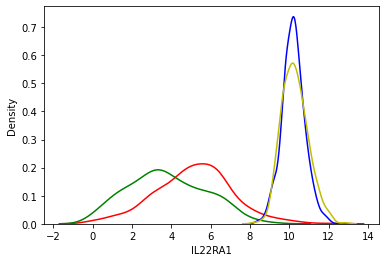

In [5]:
# plotting the distributions of the log2+1 gene expression counts
fig = sns.kdeplot(df_clean["IL22RA1"], color="r")
fig = sns.kdeplot(df_clean["IL22RA2"], color="g")
fig = sns.kdeplot(df_clean["IL10RB"], color="b")
fig = sns.kdeplot(df_clean["PVR"], color="y")
plt.show()

In [6]:

# Scaling the gene expression data for more normal distribution of the features in one scale
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

X_scaled =  pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.describe()

,IL22RA1,IL22RA2,IL10RB,PVR
count,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02
mean,2.255691e-16,-8.458842e-17,-8.106390e-16,8.106390e-16
std,1.000994e+00,1.000994e+00,1.000994e+00,1.000994e+00
min,-2.650652e+00,-1.921366e+00,-3.103312e+00,-3.059703e+00
25%,-6.441501e-01,-7.412118e-01,-6.463502e-01,-7.203442e-01
50%,5.268808e-02,-1.003317e-01,4.772773e-03,-1.012216e-01
75%,6.165498e-01,7.598904e-01,5.801838e-01,6.195479e-01
max,3.590997e+00,2.843449e+00,3.189002e+00,3.750275e+00


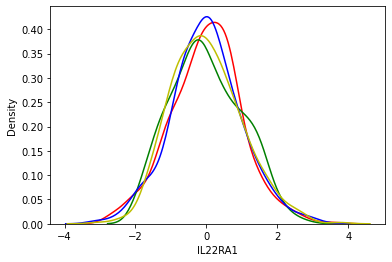

In [7]:
#density plots of the scaled dataset
fig = sns.kdeplot(X_scaled["IL22RA1"], color="r")
fig = sns.kdeplot(X_scaled["IL22RA2"], color="g")
fig = sns.kdeplot(X_scaled["IL10RB"], color="b")
fig = sns.kdeplot(X_scaled["PVR"], color="y")
plt.show()

In [8]:
#TSNE dimensionality reduction for 2D visualzation of the clusters and better performance

tsne = TSNE(n_components=2, perplexity = 20)
tsne_results = tsne.fit_transform(X_scaled).copy()
print(tsne_results)
df_TSNE = pd.DataFrame(tsne_results)
df_TSNE.columns = ['D1', 'D2'] 


[[ 36.087646   -7.693709 ]
 [ 36.01864    -6.142342 ]
 [ 36.782684   -5.7184944]
 ...
 [-26.164114  -20.94478  ]
 [-19.373135  -29.581928 ]
 [ -4.7621098 -31.39728  ]]


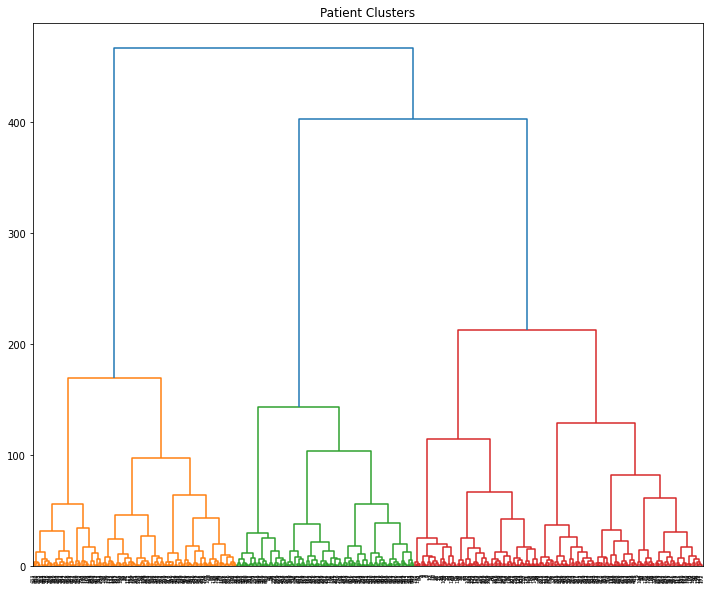

In [9]:
#dendrogram visulization of linkage of tsne reduced data

plt.figure(figsize =(12, 10)) 
plt.title('Patient Clusters') 

Dendrogram = shc.dendrogram((shc.linkage(df_TSNE, method ='ward')))
plt.savefig(fname = "LUAD_TSNE_Dendro_plt_perp20.svg", format = "svg")

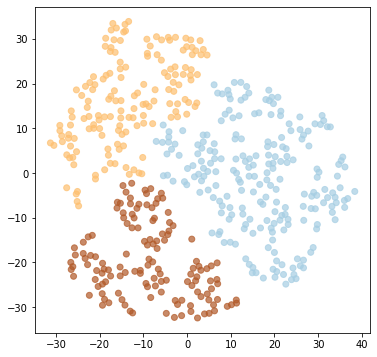

In [10]:
# Visualizing the clustering of tsne reduced data, n clusters was determined after examination of the dendrogram

ac = AgglomerativeClustering(n_clusters = 3) 
fig = plt.figure(figsize = (6,6))
plt.scatter(df_TSNE["D1"], df_TSNE["D2"], 
           c = ac.fit_predict(df_TSNE), cmap = "Paired", alpha = 0.7)
plt.savefig(fname = "LUAD_TSNE_2D_plt_perp20.svg", format = "svg")

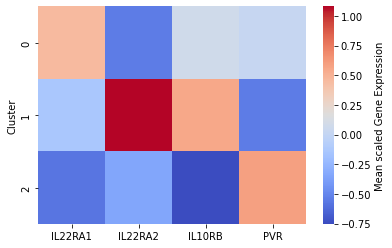

In [11]:
#Reassigning the patient codes to the TSNE transformed data, fitting the cluster algorithm to the indexed data, and joining the predicted clusters with the scaled gene expression dataset 
df_TSNE_ind = df_TSNE.set_index(X.index)
df_TSNE_ind["Cluster"] = ac.fit_predict(df_TSNE_ind)
df_clusters_tsne = X_scaled.join(df_TSNE_ind["Cluster"])

#Plotting the mean expression of each gene per cluster
cluster_means_tsne = df_clusters_tsne.groupby("Cluster").mean()
sns.heatmap(cluster_means_tsne, cmap= "coolwarm", cbar_kws = {"label":"Mean scaled Gene Expression"})
plt.savefig(fname = "LUAD_Cluster_Means_perp20.svg", format = "svg")


In [12]:
df_clusters_tsne_d = df_clusters_tsne.drop("Cluster", axis = 1).copy()
df_clusters_tsne_d

,IL22RA1,IL22RA2,IL10RB,PVR
sample,,,,
TCGA-78-7540-01,3.590997,-0.849930,0.818136,1.251607
TCGA-55-7284-01,3.013735,-0.780838,0.575857,0.187086
TCGA-49-6742-01,2.678717,-1.060255,0.506635,-0.241679
TCGA-44-6146-01,2.627175,-1.921366,1.596888,-0.484154
TCGA-55-7728-01,2.616867,0.360198,0.835441,-0.487111
...,...,...,...,...
TCGA-91-6828-01,-2.650652,0.967802,-0.810321,-0.315604
TCGA-55-7815-01,-2.650652,0.947481,-0.884735,0.704562
TCGA-55-A48Y-01,-2.650652,0.361722,-0.966071,0.881982


In [13]:
df_hm = df_clusters_tsne.sort_values("Cluster")
df_hm.drop("Cluster", axis = 1, inplace =True)

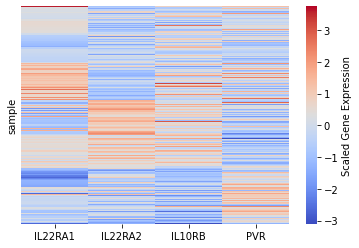

In [14]:
sns.heatmap(df_hm, cmap = "coolwarm", cbar_kws = {"label":"Scaled Gene Expression"}, yticklabels = False)
plt.savefig(fname = "LUAD_heatmap_perp20.svg", format = "svg")

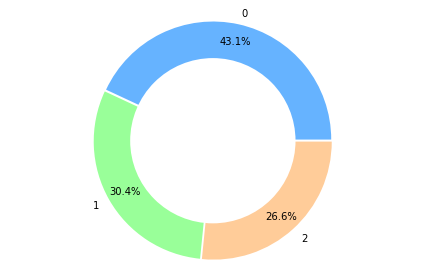

In [15]:
#Proportions of the clusters within the cohort
data = df_clusters_tsne["Cluster"].value_counts(normalize = True)*100
labels = data.index
explode = (0.01, 0.01, 0.01)
colors = ["#66b3ff", "#99ff99", "#ffcc99"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels = labels, explode = explode, colors = colors, pctdistance = 0.85, autopct="%1.1f%%")

centre_circle = plt.Circle((0,0), 0.7, fc ="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis("equal")
plt.tight_layout()
plt.savefig(fname = "LUAD_cluster_props_perp20.svg", format = "svg")
plt.show()


In [16]:
df_pc = df_clean.join(df_clusters_tsne ["Cluster"])

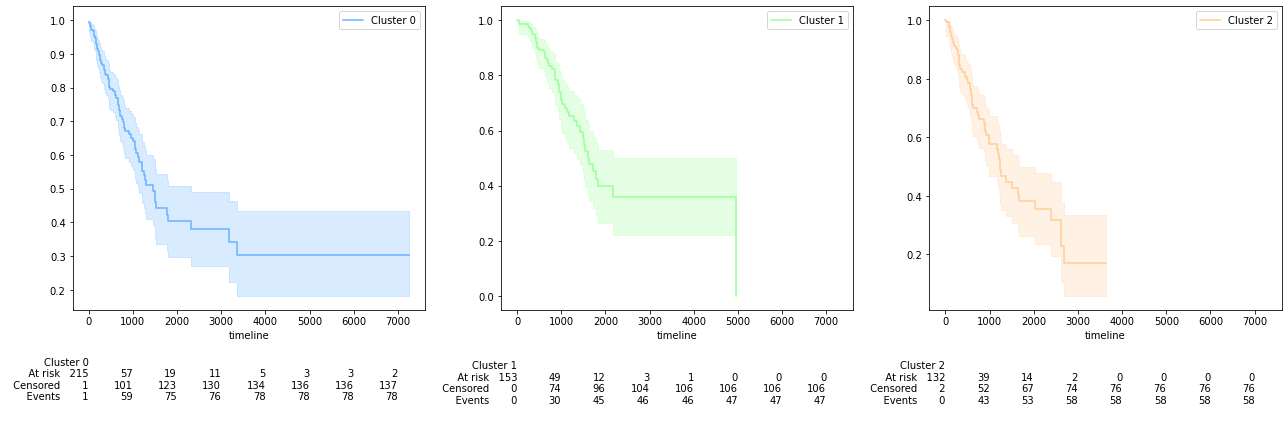

In [17]:
#Survival analysis 

from lifelines import KaplanMeierFitter
T = df_pc["OS.time"]
E = df_pc["OS"]
kmf = KaplanMeierFitter()
clusters = df_pc["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)
cl3 = (clusters == 3)

#plotting kaplan meier plots for each cluster seperately for clearness

fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (20,20))

kmf= KaplanMeierFitter()
ax0 = kmf.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax0, figsize = (18, 6), at_risk_counts = True, color = "#66b3ff")
ax1 = kmf.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax1, figsize = (18, 6), at_risk_counts = True, color = "#99ff99")
ax2 = kmf.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax2, figsize = (18, 6), at_risk_counts = True, color = "#ffcc99")
#ax3 = kmf.fit(T[cl3], E[cl3], label="Cluster 3").plot(ax=ax3, figsize = (18, 6), at_risk_counts = True, color = "#66b3ff")
#ax4 = kmf.fit(T[cl4], E[cl4], label="Cluster 4").plot(ax=ax4, figsize = (18, 6), at_risk_counts = True, color = "blue")
plt.savefig(fname = "LUAD_SurvivalbyCluster_sep_perp20.svg", format = "svg")
plt.tight_layout()

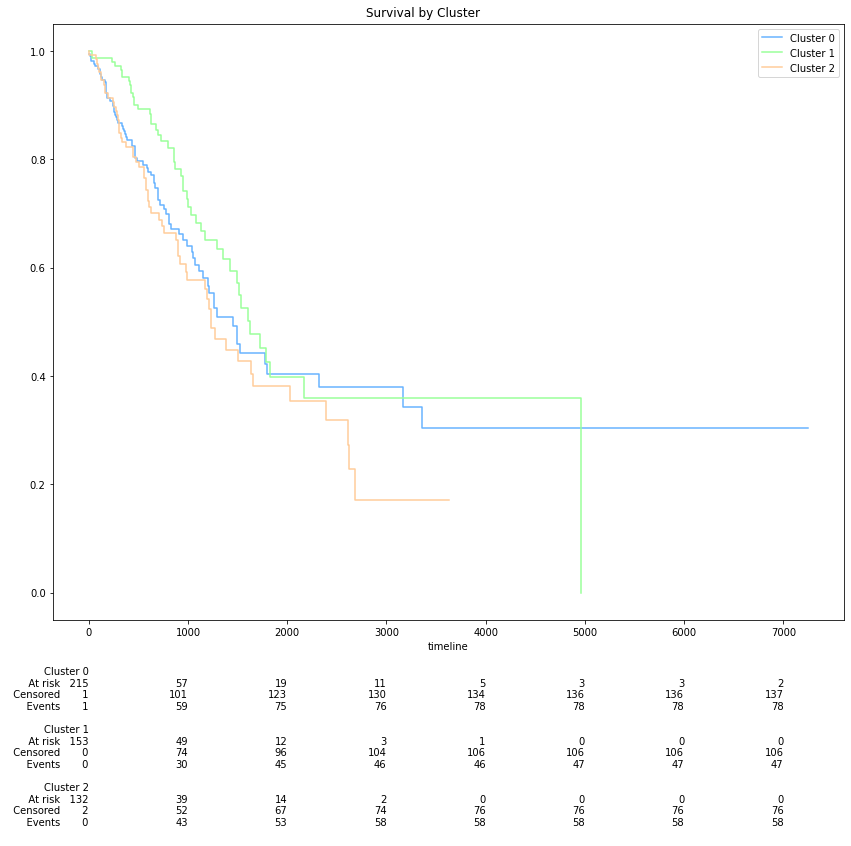

In [18]:
#plotting summary of all kaplan meier plots without confidence intervals for clearness

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")

#kmf3= KaplanMeierFitter()
#ax = kmf3.fit(T[cl3], E[cl3], label="Cluster 3").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

#kmf4= KaplanMeierFitter()
#ax = kmf4.fit(T[cl4], E[cl4], label="Cluster 4").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "blue")

                                                      
from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf0, kmf1, kmf2, ax=ax)

fig.suptitle("Survival by Cluster")
plt.savefig(fname = "LUAD_SurvivalbyCluster_all_perp20.svg", format = "svg")
plt.tight_layout()




In [19]:
#RMST (Restricted mean survival time) as an alternative measure of survival outcome that accounts for long follow up times and high varianceat the end of the observed period

from lifelines.utils import restricted_mean_survival_time
time_limit = 1825 #5 years

kmf_0 = kmf0.fit(T[cl0], E[cl0], label="Cluster 0")
rmst_0 = restricted_mean_survival_time(kmf_0, t=time_limit)

kmf_1 = kmf1.fit(T[cl1], E[cl1], label="Cluster 1")
rmst_1 = restricted_mean_survival_time(kmf_1, t=time_limit)

kmf_2 = kmf2.fit(T[cl2], E[cl2], label="Cluster 2")
rmst_2 = restricted_mean_survival_time(kmf_2, t=time_limit)



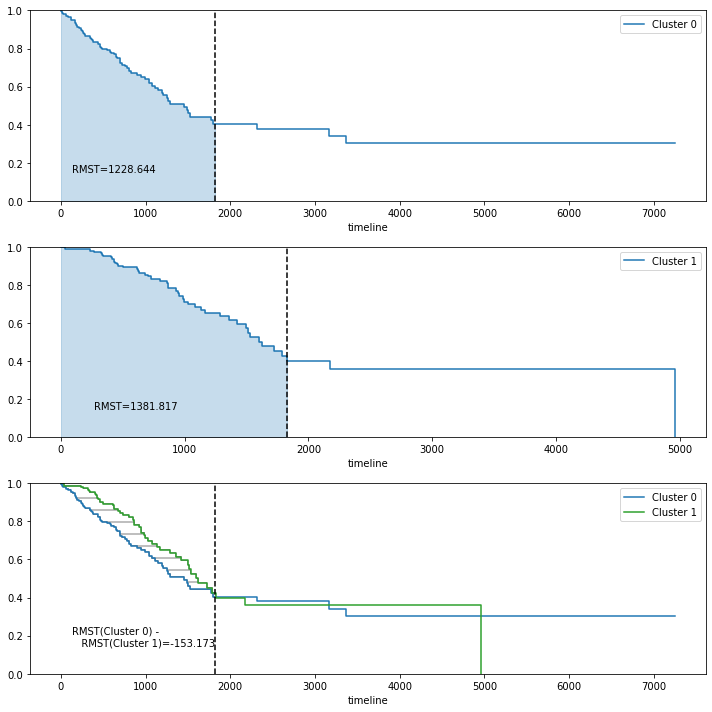

In [20]:
#Plotting the delta of RMSTs of Cluster 0 (IL22RA2 high, IL22RA1low, PVRlow) vs. Cluster 1 (IL22RA1high, PVRhigh, IL22RA2low) 

from lifelines.plotting import rmst_plot

ax = plt.subplot(311)
rmst_plot(kmf_0, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(312)
rmst_plot(kmf_1, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(313)
rmst_plot(kmf_0, model2=kmf_1, t=time_limit, ax=ax, figsize = (10,10))

plt.savefig(fname = "LUAD_Cl0vs1_RMST_perp20.svg", format = "svg")

plt.tight_layout()



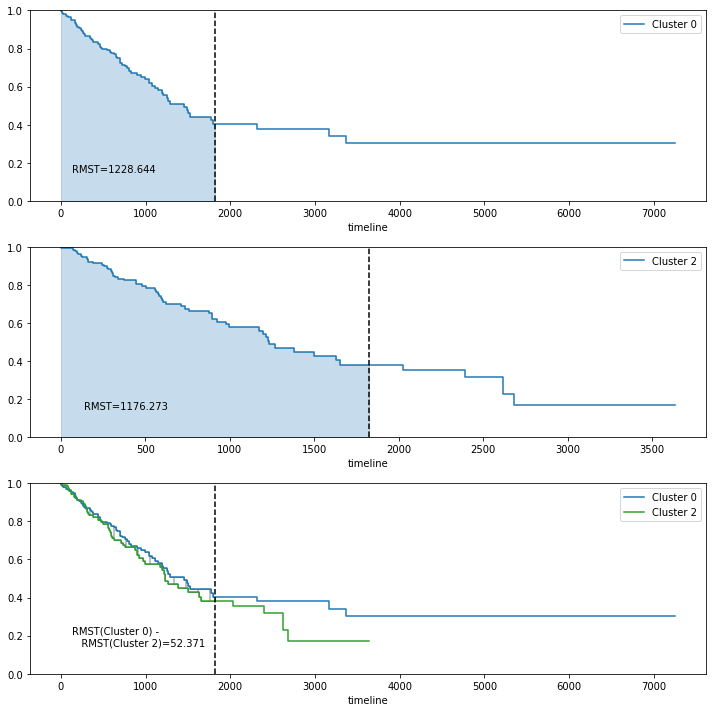

In [21]:
#Plotting the delta of RMSTs of Cluster 0 (IL22RA2 high, IL22RA1low, PVRlow) vs. Cluster 2 (IL22RA1high, PVRhigh, IL22RA2low) 

from lifelines.plotting import rmst_plot

ax = plt.subplot(311)
rmst_plot(kmf_0, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(312)
rmst_plot(kmf_2, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(313)
rmst_plot(kmf_0, model2=kmf_2, t=time_limit, ax=ax, figsize = (10,10))

plt.savefig(fname = "LUAD_Cl0vs2_RMST_perp20.svg", format = "svg")

plt.tight_layout()


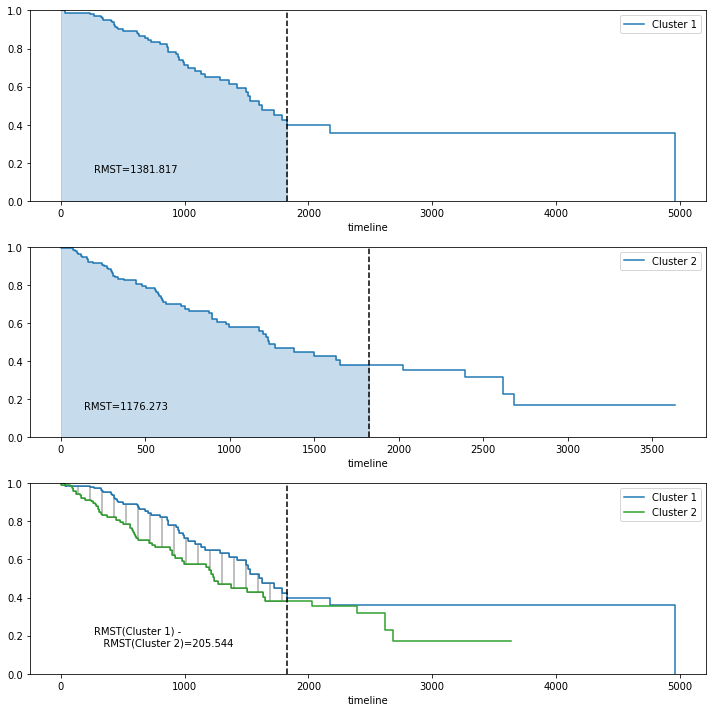

In [22]:
#Plotting the delta of RMSTs of Cluster 1 (IL22RA2 high, IL22RA1low, PVRlow) vs. Cluster 2 (IL22RA1high, PVRhigh, IL22RA2low) 

from lifelines.plotting import rmst_plot

ax = plt.subplot(311)
rmst_plot(kmf_1, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(312)
rmst_plot(kmf_2, t=time_limit, ax=ax, figsize = (10,10))


ax = plt.subplot(313)
rmst_plot(kmf_1, model2=kmf_2, t=time_limit, ax=ax, figsize = (10,10))

plt.savefig(fname = "LUAD_Cl1vs2_RMST_perp20.svg", format = "svg")

plt.tight_layout()


In [23]:
#Statistical testing iof the caplan meier models

# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1 ], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.58 0.11      3.21

In [24]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.03 0.31      1.69

In [25]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.82 0.02      5.98

In [26]:
df_cox = X_scaled.join(df_pc["OS"])
df_cox

,IL22RA1,IL22RA2,IL10RB,PVR,OS
sample,,,,,
TCGA-78-7540-01,3.590997,-0.849930,0.818136,1.251607,1
TCGA-55-7284-01,3.013735,-0.780838,0.575857,0.187086,1
TCGA-49-6742-01,2.678717,-1.060255,0.506635,-0.241679,1
TCGA-44-6146-01,2.627175,-1.921366,1.596888,-0.484154,0
TCGA-55-7728-01,2.616867,0.360198,0.835441,-0.487111,0
...,...,...,...,...,...
TCGA-91-6828-01,-2.650652,0.967802,-0.810321,-0.315604,0
TCGA-55-7815-01,-2.650652,0.947481,-0.884735,0.704562,0
TCGA-55-A48Y-01,-2.650652,0.361722,-0.966071,0.881982,0


In [27]:
df_cox_surv =df_cox.join(df_pc["OS.time"])
df_cox_surv

,IL22RA1,IL22RA2,IL10RB,PVR,OS,OS.time
sample,,,,,,
TCGA-78-7540-01,3.590997,-0.849930,0.818136,1.251607,1,1197
TCGA-55-7284-01,3.013735,-0.780838,0.575857,0.187086,1,243
TCGA-49-6742-01,2.678717,-1.060255,0.506635,-0.241679,1,488
TCGA-44-6146-01,2.627175,-1.921366,1.596888,-0.484154,0,728
TCGA-55-7728-01,2.616867,0.360198,0.835441,-0.487111,0,704
...,...,...,...,...,...,...
TCGA-91-6828-01,-2.650652,0.967802,-0.810321,-0.315604,0,323
TCGA-55-7815-01,-2.650652,0.947481,-0.884735,0.704562,0,773
TCGA-55-A48Y-01,-2.650652,0.361722,-0.966071,0.881982,0,630


<lifelines.CoxPHFitter: fitted with 504 total observations, 321 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 504
number of events observed = 183
   partial log-likelihood = -966.46
         time fit was run = 2022-04-04 20:33:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
IL22RA1     0.21       1.23       0.08             0.06             0.36                 1.06                 1.43
IL22RA2    -0.08       0.92       0.08            -0.23             0.08                 0.79                 1.08
IL10RB      0.08       1.08       0.08            -0.08             0.23                 0.93                 1.26
PVR         0.25       1.28       0.07             0.11             0.39                 1.11                 1.48

            cmp to     z      p   -log2(p)
covariate                                 
IL22RA1       0.00  2.72   0.01       7.26
IL22RA2       0.00 -1.00   0.32       1.65
IL10RB        0.00  1.00   0.32       1.66
PVR           0.00  3.47 <0.005      10.91
---
Concordance = 0.61
Partial AIC = 1940.93
log-likelihood ratio test = 23.26 on 4 df
-log2(p) of ll-ratio test = 13.12

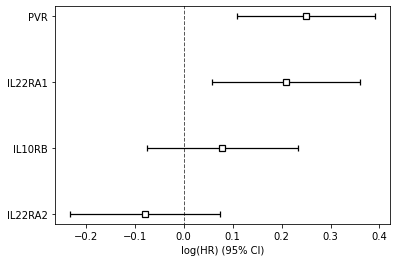

In [28]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model to see the impact of each gene on survival 
cph = CoxPHFitter()
cph.fit(df_cox_surv, duration_col = "OS.time", event_col='OS')
cph.print_summary()
cph.plot()
plt.savefig(fname = "LUAD_CoxPH_genes_perp20.svg", format = "svg")

In [29]:
df_pc

,samples,IL22RA1,IL22RA2,IL10RB,PVR,OS,OS.time,pathologic_stage,histological_type,sample_type,Cluster
sample,,,,,,,,,,,
TCGA-78-7540-01,TCGA-78-7540-01,12.11,2.109,10.680,11.130,1,1197,Stage IB,Lung Bronchioloalveolar Carcinoma Mucinous,Primary Tumor,0
TCGA-55-7284-01,TCGA-55-7284-01,10.99,2.245,10.540,10.410,1,243,Stage IIB,Lung Bronchioloalveolar Carcinoma Nonmucinous,Primary Tumor,0
TCGA-49-6742-01,TCGA-49-6742-01,10.34,1.695,10.500,10.120,1,488,Stage IIA,Mucinous (Colloid) Carcinoma,Primary Tumor,0
TCGA-44-6146-01,TCGA-44-6146-01,10.24,0.000,11.130,9.956,0,728,Stage IIB,Lung Mucinous Adenocarcinoma,Primary Tumor,0
TCGA-55-7728-01,TCGA-55-7728-01,10.22,4.491,10.690,9.954,0,704,Stage IB,Mucinous (Colloid) Carcinoma,Primary Tumor,0
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-91-6828-01,TCGA-91-6828-01,0.00,5.687,9.739,10.070,0,323,Stage IA,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor,2
TCGA-55-7815-01,TCGA-55-7815-01,0.00,5.647,9.696,10.760,0,773,Stage IB,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor,2
TCGA-55-A48Y-01,TCGA-55-A48Y-01,0.00,4.494,9.649,10.880,0,630,Stage IIA,Lung Adenocarcinoma- Not Otherwise Specified (...,Primary Tumor,2


In [30]:
df_pc["pathologic_stage"] = df_pc["pathologic_stage"].replace({"Stage IA": "Stage I", "Stage IB": "Stage I", "Stage IIA": "Stage II", "Stage IIB": "Stage II",
                                                              "Stage IIIA": "Stage III", "Stage IIIB": "Stage III"})
df_pc["pathologic_stage"].value_counts()


Stage I          270
Stage II         120
Stage III         81
Stage IV          26
[Discrepancy]      7
Name: pathologic_stage, dtype: int64

In [31]:
df_stage_cl = df_pc.drop(["IL22RA1", "IL22RA2", "samples", "IL10RB", "PVR", "histological_type", "sample_type", "OS", "OS.time"], axis =1)

In [32]:
df_stage_cl

,pathologic_stage,Cluster
sample,,
TCGA-78-7540-01,Stage I,0
TCGA-55-7284-01,Stage II,0
TCGA-49-6742-01,Stage II,0
TCGA-44-6146-01,Stage II,0
TCGA-55-7728-01,Stage I,0
...,...,...
TCGA-91-6828-01,Stage I,2
TCGA-55-7815-01,Stage I,2
TCGA-55-A48Y-01,Stage II,2


In [33]:
df_cl_0 = df_stage_cl.loc[df_stage_cl["Cluster"]==0]
df_cl_1 = df_stage_cl.loc[df_stage_cl["Cluster"]==1]
df_cl_2 = df_stage_cl.loc[df_stage_cl["Cluster"]==2]
#df_cl_3 = df_stage_cl.loc[df_stage_cl["Cluster"]==3]



In [34]:
data_sc_0 = pd.DataFrame(df_cl_0.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)
data_sc_1 = pd.DataFrame(df_cl_1.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)
data_sc_2 = pd.DataFrame(df_cl_2.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)
#data_sc_3 = pd.DataFrame(df_cl_3.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)

In [35]:
data_sc_0.reset_index(level=0, drop=True, inplace = True)
data_sc_1.reset_index(level=0, drop=True, inplace = True)
data_sc_2.reset_index(level=0, drop=True, inplace = True)
#data_sc_3.reset_index(level=0, drop=True, inplace = True)

In [36]:
data_sc_0.sort_index(inplace = True)
data_sc_1.sort_index(inplace = True)
data_sc_2.sort_index(inplace = True)
#data_sc_3.sort_index(inplace = True)

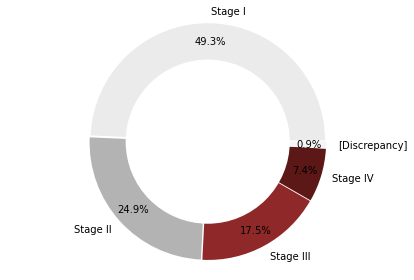

In [37]:
#Proportions of stages within cluster 0
data = data_sc_0.squeeze()
labels = data_sc_0.index

explode = [0.01 for record in data]

colors = ["#ebebeb", "#b3b3b3", "#8f2929", "#5c1717", "#f5f5f5"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels = labels, explode = explode, colors = colors, pctdistance = 0.85, autopct="%1.1f%%")

centre_circle = plt.Circle((0,0), 0.7, fc ="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis("equal")
plt.tight_layout()
plt.savefig(fname = "LUAD_Cl0_stages_perp20.svg", format = "svg")
plt.show()

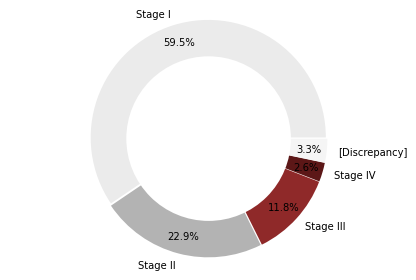

In [38]:
#Proportions of stages within cluster 1
data = data_sc_1.squeeze()
labels = data_sc_1.index
explode = [0.01 for record in data]
colors = ["#ebebeb", "#b3b3b3", "#8f2929", "#5c1717", "#f5f5f5"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels = labels, explode = explode, colors = colors, pctdistance = 0.85, autopct="%1.1f%%")

centre_circle = plt.Circle((0,0), 0.7, fc ="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis("equal")
plt.tight_layout()
plt.savefig(fname = "LUAD_Cl1_stages_perp20.svg", format = "svg")
plt.show()


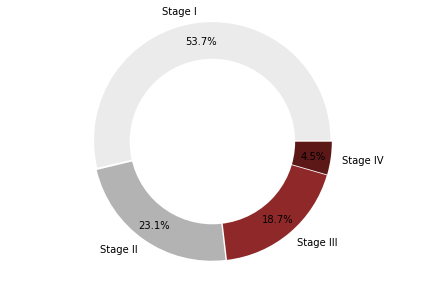

In [39]:
#Proportions of stages within cluster 2
data = data_sc_2.squeeze()
labels = data_sc_2.index
explode = [0.01 for record in data]
colors = ["#ebebeb", "#b3b3b3", "#8f2929", "#5c1717"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels = labels, explode = explode, colors = colors, pctdistance = 0.85, autopct="%1.1f%%")

centre_circle = plt.Circle((0,0), 0.7, fc ="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis("equal")
plt.tight_layout()
plt.savefig(fname = "LUAD_Cl2_stages_perp20.svg", format = "svg")
plt.show()

In [40]:
data_sc_0 = pd.DataFrame(df_cl_0.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)
data_sc_1 = pd.DataFrame(df_cl_1.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)
data_sc_2 = pd.DataFrame(df_cl_2.groupby("Cluster")["pathologic_stage"].value_counts(normalize = True)*100)

In [41]:
summary = pd.DataFrame(df_stage_cl.groupby("Cluster")["pathologic_stage"].value_counts())
summary.to_excel("LUAD_summary_stages_perp20.xlsx")

In [42]:
df_TSNE_ind0 = df_TSNE_ind.loc[df_TSNE_ind["Cluster"] == 0]

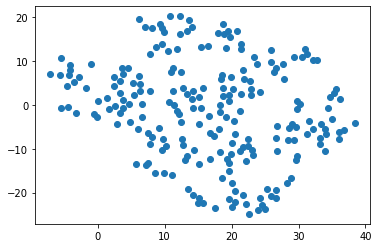

In [43]:
plt.scatter(df_TSNE_ind0["D1"], df_TSNE_ind0["D2"])

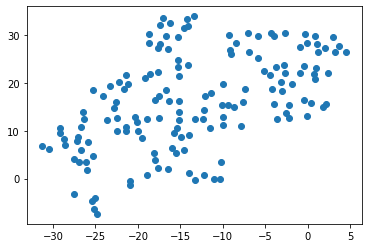

In [44]:
df_TSNE_ind1 = df_TSNE_ind.loc[df_TSNE_ind["Cluster"] == 1]
plt.scatter(df_TSNE_ind1["D1"], df_TSNE_ind1["D2"])

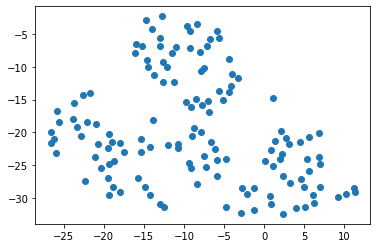

In [45]:
df_TSNE_ind2 = df_TSNE_ind.loc[df_TSNE_ind["Cluster"] == 2]
plt.scatter(df_TSNE_ind2["D1"], df_TSNE_ind2["D2"])

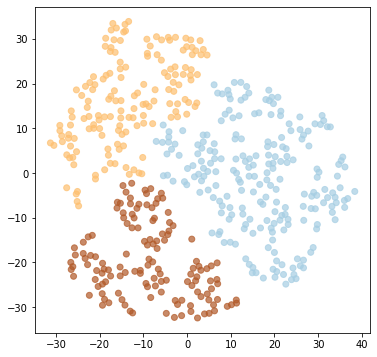

In [46]:
fig = plt.figure(figsize = (6,6))
plt.scatter(df_TSNE["D1"], df_TSNE["D2"], 
           c = ac.fit_predict(df_TSNE), cmap = "Paired", alpha = 0.7)
#cluster0 = blue, cluster 1 = orange cluster2 = brown

In [47]:
df_pc.to_excel("LUAD_Table_for_decon.xlsx")